# Linear Regression

## Vectorization for Speed

In [1]:
import torch
from time import time
print(torch.__version__)

1.2.0


In [2]:
a = torch.ones(1000)
b = torch.ones(1000)

Add slow:

In [3]:
start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i] + b[i]

print(time() - start)

0.020943164825439453


Add fast:

In [4]:
start = time()
d = a + b
print(time() - start)

0.0


## The Normal Distribution and Squared Loss

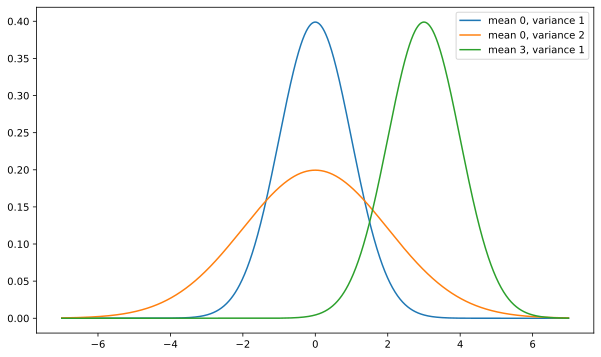

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display
import torch
import math

x = torch.arange(-7, 7, 0.01)
parameters = [(0,1), (0,2), (3,1)]

display.set_matplotlib_formats('svg')
plt.figure(figsize=(10, 6))
for (mu, sigma) in parameters:
    p = (1/math.sqrt(2 * math.pi * sigma ** 2)) * torch.exp(-(0.5/sigma**2) * (x - mu)**2)
    plt.plot(x.numpy(), p.numpy(), label='mean ' + str(mu) + ', variance ' + str(sigma))

plt.legend()
plt.show()



$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right)$$

**The key assumption in linear regression with least mean squares loss is that the observations actually arise from noisy observations, where noise is added to the data, e.g. as part of the observation process.**

$$ y = \mathbf{w}^\top \mathbf{x} + b + \epsilon \text{ where } \epsilon \sim \mathcal{N}(0, \sigma^2) $$

So if the noise $\epsilon$ obeys the normal distribution. We can write the likelihood of seeing a particular y for a given x via

$$ p(y|\mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2 }} \exp\left(-\frac{1}{2\sigma^2}(y - \mathbf{w}^\top\mathbf{x} -b)^2\right)$$

Maximizing the likelihood of the data subject to the parameters is well known as the Maximum Likelihood Principle. It is easier to minimize the negative log of it.

$$-\log p(\mathbf y|\mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2 $$



The first term has nothing to do with w and b. We can ignore it for minimizing. The second term explains why linear regression uses the least square function as its loss function. It comes from this Gaussian noise assumption.

A intuition for it is, given a set of y under x, we want to find a distribution which has the maximum square over the probability density function. That means the value of noise should almost stay in the middle of the normal distribution. It has nothing to do with $\sigma$. We only need to find the right $\mu$, to shift the distribution to let the noise stay in the middle at most, which now are the paramers (w and b) in the second term.

The difference between likelihood and propapility density function. [See](https://stats.stackexchange.com/questions/2641/what-is-the-difference-between-likelihood-and-probability)